In [15]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
df = pd.read_csv("imp_metrics_pf.csv")
df.shape

(285707, 5)

In [16]:
df.head(10)

,id,seat#,transaction#,spend$,end_date
0,15,174,3,31.32,12/29/2015
1,89,27,5,682.49,8/8/2015
2,145,4,2,15.44,10/7/2015
3,228,9,4,242.65,12/31/2015
4,239,7,2,256.82,11/23/2015
5,427,8,1,366.10,10/25/2014
6,490,4,2,118.56,12/10/2014
7,552,163,82,275.94,9/7/2015
8,554,7,2,258.47,1/4/2014
9,600,16,5,183.26,9/8/2014


In [17]:
df1 = df[['seat#','transaction#','spend$']]
df1['seat#'] = preprocessing.scale(df1['seat#'].astype('float64'))
df1['transaction#'] = preprocessing.scale(df1['transaction#'].astype('float64'))
df1['spend$'] = preprocessing.scale(df1['spend$'].astype('float64'))

C:\Users\thous\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\thous\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\thous\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [18]:
df1.head(10)

,seat#,transaction#,spend$
0,41.614820,2.034481,-1.123313
1,5.371540,4.659149,3.409587
2,-0.299177,0.722147,-1.233856
3,0.933588,3.346815,0.347789
4,0.440482,0.722147,0.446429
5,0.687035,-0.590187,1.207145
6,-0.299177,0.722147,-0.516021
7,38.902738,105.708869,0.579526
8,0.440482,0.722147,0.457915
9,2.659458,4.659149,-0.065634


In [19]:
train = df1

In [20]:
train.shape[0]

285707

In [21]:
from scipy.spatial.distance import cdist
clusters = range(1,30)
mean_dist = []
for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(train)
    clusassign = model.predict(train)
    
    mean_dist.append(sum(np.min(cdist(train,model.cluster_centers_,'euclidean'),axis = 1))/train.shape[0])

In [27]:
model.cluster_centers_

array([[-2.84873585e-01,  7.22224522e-01, -5.75944055e-01],
       [ 1.70226498e-01, -5.90186750e-01,  5.73338043e-01],
       [ 4.75102377e+00,  4.07500065e+00,  3.79479315e+00],
       [-7.90958400e-01, -5.90186750e-01, -6.47432765e-01],
       [ 2.59904089e+00,  7.13761748e-01,  2.05765970e+00],
       [ 1.17783984e+00,  3.44919597e+00,  2.66857821e-01],
       [ 1.34318720e+02,  2.43441596e+01,  1.38353664e+02],
       [ 1.37363628e-01,  7.22147269e-01, -8.38403161e-02],
       [ 1.24500954e+00, -4.92040369e-01,  2.32049271e+00],
       [ 7.46821859e+00,  3.23224646e+00,  7.49254019e+00],
       [-2.22235580e-01, -5.90186750e-01,  5.49968578e-02],
       [ 1.68538623e+01,  2.62189225e+01,  9.02216799e+00],
       [ 5.08575673e-01,  2.03814976e+00, -9.31240978e-02],
       [ 3.89027381e+01,  1.05708869e+02,  5.79526382e-01],
       [ 2.55096404e+00,  3.57059063e+00,  1.30937616e+00],
       [ 1.80070549e+00,  7.18286706e-01,  9.41666704e-01],
       [ 2.11976056e+00, -1.91910073e-01

In [28]:
mean_dist

[1.3053283932394575,
 1.005622379811045,
 0.7822131109493005,
 0.6989509452484157,
 0.6509419515444533,
 0.5544319278521882,
 0.550418674379248,
 0.5111461622694039,
 0.4842972537478515,
 0.44516771527648763,
 0.43597565631250884,
 0.40557410507553143,
 0.40792212236372094,
 0.38507684340777854,
 0.378268191430035,
 0.36875612655196705,
 0.35790406640413963,
 0.34556636989030476,
 0.3357876970478754,
 0.3297112524488517,
 0.32597208599414856,
 0.3187416421728698,
 0.31197810341424076,
 0.3040463516067586,
 0.29359563944194694,
 0.27537564055628033,
 0.2762902259455532,
 0.2731113513101029,
 0.27115465476366035]

In [29]:
len(mean_dist )

29

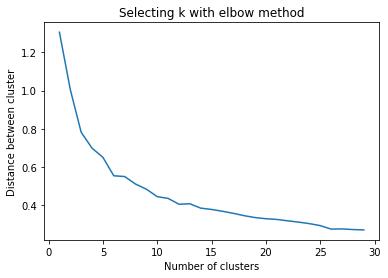

In [31]:
import matplotlib.pylab as plt

plt.plot(clusters,mean_dist)
plt.xlabel("Number of clusters")
plt.ylabel("Distance between cluster")
plt.title("Selecting k with elbow method")
plt.show()

In [33]:
model = KMeans(n_clusters = 5)
model.fit(train)
clusassign = model.predict(train) 

In [34]:
list(model.labels_ )

[1,
 1,
 2,
 3,
 2,
 4,
 2,
 3,
 2,
 3,
 2,
 0,
 0,
 2,
 3,
 0,
 1,
 3,
 1,
 3,
 2,
 0,
 3,
 3,
 2,
 3,
 1,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 2,
 0,
 2,
 3,
 3,
 2,
 1,
 0,
 0,
 2,
 4,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 1,
 0,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 4,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 3,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 3,
 2,
 3,
 3,
 2,
 0,
 2,
 2,
 2,
 3,
 2,
 0,
 2,
 3,
 0,
 2,
 2,
 3,
 2,
 0,
 0,
 3,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 3,
 2,
 4,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 3,
 0,
 3,
 2,
 3,
 0,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 0,
 2,
 2,
 2,
 3,
 0,
 2,
 2,
 2,
 0,
 3,
 2,
 2,
 3,
 2,
 0,
 2,
 4,
 0,
 2,
 2,
 0,
 3,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 3,
 2,
 0,
 0,
 3,
 0,
 1,
 3,
 0,
 2,
 2,
 2,
 4,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 0,
 0,
 0,
 2,
 3,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 3,
 2,
 2,
 3,
 3,
 0,
 4,
 3,
 2,
 0,
 0,
 2,
 3,
 2,


In [35]:
df1['cluster'] = list(model.labels_)

C:\Users\thous\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df['cluster'] = list(model.labels_)

In [37]:
df.head()

,id,seat#,transaction#,spend$,end_date,cluster
0,15,174,3,31.32,12/29/2015,1
1,89,27,5,682.49,8/8/2015,1
2,145,4,2,15.44,10/7/2015,2
3,228,9,4,242.65,12/31/2015,3
4,239,7,2,256.82,11/23/2015,2


In [38]:
df.cluster.value_counts()

0    157095
2     72435
4     40723
3      9462
1      5992
Name: cluster, dtype: int64

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
pca2 = PCA(2)
plot_columns = pca2.fit_transform(train)

In [40]:
plot_columns

array([[18.98800743, 20.38628254],
       [ 5.32867084,  5.07550354],
       [ 0.20777502, -1.29934712],
       ...,
       [-1.07609683,  0.61179355],
       [-1.68936407, -0.07785236],
       [ 0.49997517, -0.99052598]])

In [41]:
plot_columns[:,0]

array([18.98800743,  5.32867084,  0.20777502, ..., -1.07609683,
       -1.68936407,  0.49997517])

In [42]:
plot_columns[:,0].shape

(285707,)

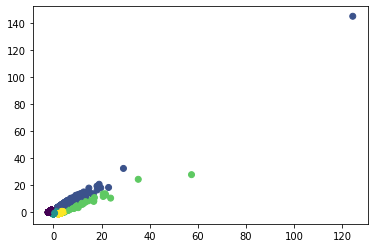

In [44]:
plt.scatter(x = plot_columns[:,0],y = plot_columns[:,1], c = model.labels_,)
plt.show()